## Analyse the influence of the variables describing every aspect of residential homes on the house's price

### As a home buyer who describe your dream house, you probably won't begin with the height of the basement ceiling or the proximity to a nearby railroad.
### However, research shows that many subtle factors influence price negotiations beyond just the number of bedrooms or bathrooms
### In this project, with 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa. We will study their impact on the property’s value and how they do it
### This exploratory data analysis (EDA) aims not only to uncover the main factors affecting house prices, but also to lay the groundwork for a future machine learning model that will predict housing prices based on these insights.
### That model will be developed and presented in a separate project within my Machine Learning Portfolio.

## Objectives:

#### -Understand the main factors that drive house prices.

#### -Visualize relationships between key variables and sale price.

#### -Provide insights that could guide buyers, sellers, or real estate analysts

#### -Prepare the dataset and findings to be used later for training a predictive ML model in another portfolio project.



In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


In [38]:
houses = pd.read_csv("train.csv")
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [39]:
houses.shape

(1460, 81)

In [40]:
houses.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [41]:
#Search for missing data
for i in houses.columns:
    if houses[i].isnull().sum() != 0 :
        print(f"{i}: {houses[i].isnull().sum()}")

LotFrontage: 259
Alley: 1369
MasVnrType: 872
MasVnrArea: 8
BsmtQual: 37
BsmtCond: 37
BsmtExposure: 38
BsmtFinType1: 37
BsmtFinType2: 38
Electrical: 1
FireplaceQu: 690
GarageType: 81
GarageYrBlt: 81
GarageFinish: 81
GarageQual: 81
GarageCond: 81
PoolQC: 1453
Fence: 1179
MiscFeature: 1406


In [43]:
# handling missing values
miss_col = houses.columns[houses.isnull().sum() > 0]
for i in miss_col:
    # if the feature is numerical we raplace it by 0
    if pd.api.types.is_numeric_dtype(houses[i]) == True :
        if i == "LotFrontage":
            houses[i] = houses[i].fillna(np.median(houses[i]))
        elif i == "GarageYrBlt":
            # we will create a new features called garageAge so that the -1 value will mean no garage instead of Year 0
            houses[i] = houses[i].fillna(-1)
            # iterate trough each row the if/else condition and assign it to the new feature
            houses["GarageAge"] = houses.apply(lambda row: row["YrSold"] - row[i] if row[i] > 0 else -1,axis=1)
            houses = houses.drop("GarageYrBlt",axis='columns')
        else:
            houses[i] = houses[i].fillna(0)
    # the object features we add "no feature"
    else :
        houses[i] = houses[i].fillna("no feature")

#### In the dataset many missing values doesn't represent missing data, it represents the absence of the feature.
#### For exemple the features Garage with None values means that the house doesn't contain a garage

In [44]:
for i in houses.columns:
    if houses[i].dtype == "object" :
        print(f"{i}: {houses[i].unique()}")

MSZoning: ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street: ['Pave' 'Grvl']
Alley: ['no feature' 'Grvl' 'Pave']
LotShape: ['Reg' 'IR1' 'IR2' 'IR3']
LandContour: ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities: ['AllPub' 'NoSeWa']
LotConfig: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope: ['Gtl' 'Mod' 'Sev']
Neighborhood: ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1: ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2: ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType: ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle: ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle: ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl: ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior

In [45]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [46]:
#heteroscedasticity
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
from statsmodels.formula.api import ols

# Fit the OLS model
model = ols(formula='SalePrice~OverallQual', data=houses).fit()

white_test = het_white(model.resid,  model.model.exog)
bp_test = het_breuschpagan(model.resid, model.model.exog)

output_df = pd.DataFrame(columns=['LM stat', 'LM p-value', 'F-stat', 'F p-value'])
output_df.loc['White'] = white_test
output_df.loc['Breusch-Pagan'] = bp_test

output_df.round(3)

,LM stat,LM p-value,F-stat,F p-value
White,228.213,0.0,134.969,0.0
Breusch-Pagan,102.048,0.0,109.566,0.0


### The tests confirm that significant heteroscedasticity is present in the data. This means the variance of the errors is not constant.

C:\Users\agnao\AppData\Local\Temp\ipykernel_29944\387872072.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(houses['SalePrice'])


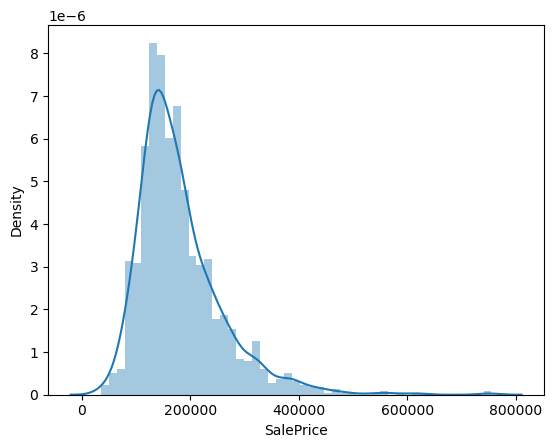

In [47]:
sns.distplot(houses['SalePrice'])
plt.show()

In [48]:
houses['SalePrice'].skew()

1.8828757597682129

In [49]:
#We will use the log fct to fix the skewness
np.log(houses['SalePrice']).skew()

0.12133506220520406

C:\Users\agnao\AppData\Local\Temp\ipykernel_29944\1891384787.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(houses['SalePrice_log'])


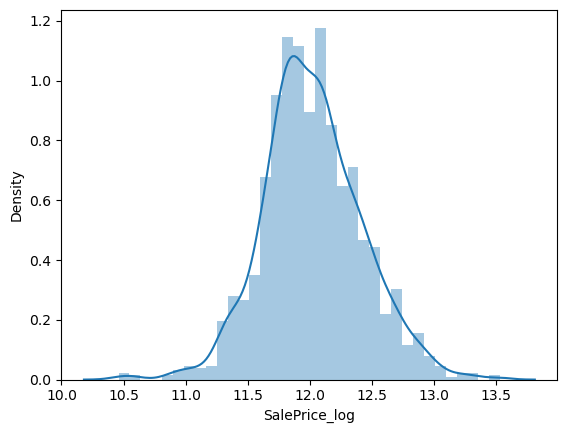

In [50]:
houses['SalePrice_log'] = np.log(houses['SalePrice'])
sns.distplot(houses['SalePrice_log'])
plt.show()

#### This new distribution shows that using np.log() solved the problem and it looks more like a Gaussion(normal) Distrbution

In [51]:
model = ols(formula='SalePrice_log~OverallQual', data=houses).fit()

white_test = het_white(model.resid,  model.model.exog)
bp_test = het_breuschpagan(model.resid, model.model.exog)

output_df = pd.DataFrame(columns=['LM stat', 'LM p-value', 'F-stat', 'F p-value'])
output_df.loc['White'] = white_test
output_df.loc['Breusch-Pagan'] = bp_test

output_df.round(3)

,LM stat,LM p-value,F-stat,F p-value
White,18.704,0.000,9.454,0.000
Breusch-Pagan,0.084,0.772,0.084,0.772


In [52]:
# search for significant correlion between houses features and the Price 
corr_df = pd.DataFrame(columns =["corr","P_value"])
for col in houses.columns:
    if pd.api.types.is_numeric_dtype(houses[col]) == True and col not in ["SalePrice_log","SalePrice"]:
        corr,P_value = stats.pearsonr(houses.SalePrice_log,houses[col])
        if abs(corr) > 0.3 and P_value < 0.05 :
            corr_df.loc[col] = [round(corr,3),round(P_value,3)]
corr_df_sorted = corr_df.sort_values(by='corr', ascending=False)


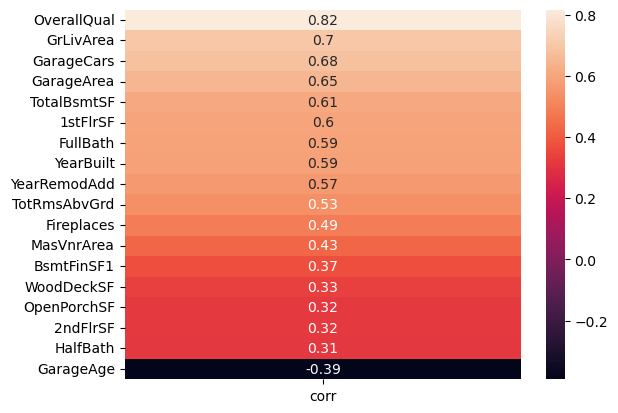

In [53]:
sns.heatmap(data=corr_df_sorted[['corr']],annot=True)
plt.show()

### Insights :

#### - With P-values are equal or close to zero, we can confidently reject the null hypothesis is completly.

#### - The highest correlation with House Price is "Overall quality" (r = 0.82) wich means that sellers trust and highly consider the Overall rating of the houses.

#### - Garage features (including Garage Area and Garage Cars) have a strong correlation with the SalePrice (r > 0.6) showing their importance to buyer. Except the added feature GarageAge that has a negative correlation (r = -39) wich is logical.

#### - The Year of build/remodel plays a substantial role on the price (r > 0.5).

#### - Surprisingly, features such as Open Porch area, Second Floor square footage, and Wood Deck size have a relatively weak influence influence on the price (r = 0.32).

#### - As expected, 1st floor square feet of the house has a strong relation with the price (r = 0.6).

In [54]:
# checking for categories that occures fewer time
threshold = len(houses)*0.01
for col in houses.select_dtypes('object'):
    # check if rare categories have distinct prices
    means = houses.groupby(col)['SalePrice_log'].mean()
    for i in houses[col].unique():
        count = houses[houses[col] == i].shape[0]
        if count < threshold:
            # check if the rare categorie influence the price
            if abs(means[i] - houses['SalePrice_log'].mean()) < 0.1 * houses['SalePrice_log'].std():
                # replace not special categorie by 'Other' to avoid loosing meaningful information to prepare for ML
                houses[col] = houses[col].replace(i, 'Other')
            

In [55]:
def t_test(feature,label):
    groups = houses[feature].unique()
    scores_yes = houses[houses[feature] == groups[0]]
    scores_no  = houses[houses[feature] == groups[1]]

    # Run independent t-test
    t, p = stats.ttest_ind(scores_yes[label], scores_no[label])
    return t,p

for i in houses.columns:
    if houses[i].dtype == "object" and houses[i].nunique()== 2:
        # we classify the categorical features by F-statistic score 
            print(f"{i} : t-statistic = {t_test(i,'SalePrice_log')[0]} , p-value = {t_test(i,'SalePrice_log')[1]}")
            


Street : t-statistic = 2.194186681587338 , p-value = 0.028379306326548986
Utilities : t-statistic = 0.4823786021595306 , p-value = 0.6296094276397239
CentralAir : t-statistic = 14.341094332785493 , p-value = 9.855628007883011e-44


#### Only CentralAir and Street rejects the null hypothesis (p-value<0.05).
#### CentralAir has a significant effect on SalePrice (t-stat = 14.32). On the other hand the relation between Street and the Price is weak (t-stat = 2.19)

In [56]:
#create a function for One-way Anova (takes 3 or more groups)
def Anova(feature,label):
    groups = houses[feature].unique()
    group_values = []
    for group in groups :
        group_values.append(houses[houses[feature]==group][label])

    # Run independent t-test
    return stats.f_oneway(*group_values) #dynamically put list of values inside the function

elite_features = []
strong_features = []
moderate_features = []
for i in houses.columns:
    if houses[i].dtype == "object" and houses[i].nunique()> 2:
        # we classify the categorical features by F-statistic score 
        if Anova(i,'SalePrice_log')[1] < 0.05 and Anova(i,'SalePrice_log')[0] > 50:
            elite_features.append(i)
        elif Anova(i,'SalePrice_log')[1] < 0.05 and Anova(i,'SalePrice_log')[0] > 10:
            strong_features.append(i)
        elif Anova(i,'SalePrice_log')[1] < 0.05 and Anova(i,'SalePrice_log')[0] > 5:
            moderate_features.append(i)


In [57]:
print(elite_features)
print(strong_features)
print(moderate_features)


['MSZoning', 'Neighborhood', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'PavedDrive']
['Alley', 'LotShape', 'LandContour', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Electrical', 'GarageQual', 'GarageCond', 'Fence', 'SaleType', 'SaleCondition']
['LotConfig', 'Condition1', 'Heating', 'Functional']


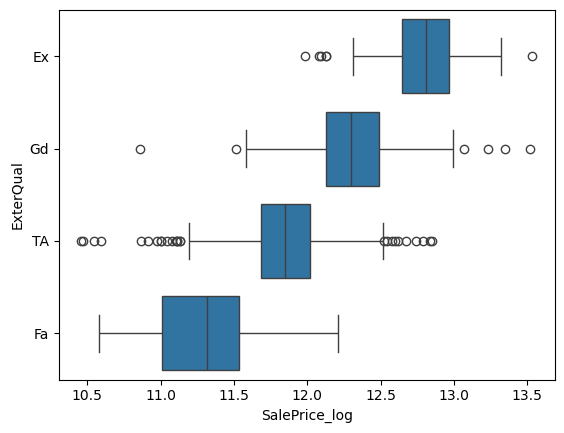

In [58]:
sns.boxplot(data=houses,x="SalePrice_log",y="ExterQual",order=['Ex','Gd','TA','Fa']) # TA : typical/Average
plt.show()

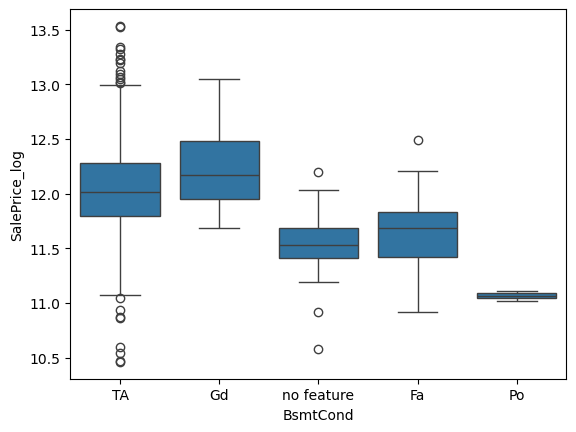

In [59]:
sns.boxplot(data=houses,x="BsmtCond",y="SalePrice_log") 
plt.show()
# There are only 2 houses with poor bsmtqual

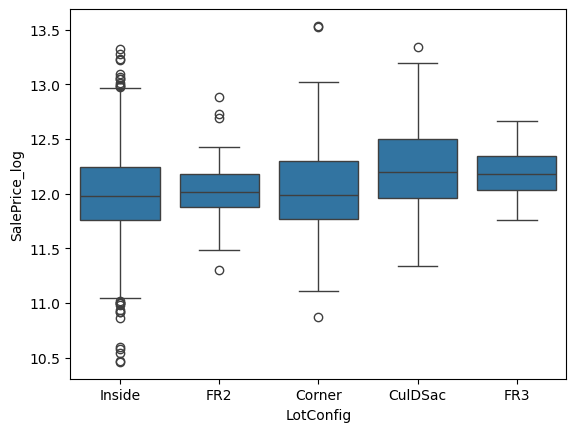

In [60]:
sns.boxplot(data=houses,x="LotConfig",y="SalePrice_log") 
plt.show()

#### These plots show the difference in the strenght of the relationship between each tier of categorical features and Sale Price

#### The plot shows that the distribution of SalePrice is positively skewed or right-skewed

#### Confirming that the Skewness is solved

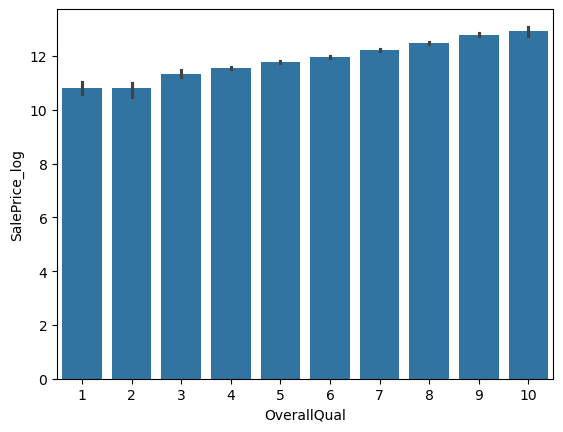

In [61]:
sns.barplot(data=houses,x="OverallQual",y="SalePrice_log")
plt.show()

### The plot confirms a strong, positive correlation between Overall Quality and Sale Price, it reveal a clear improvement in the SalePrice as the OverallQual increase from 2 to 10.